# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 14: The one-dimensional energy balance model

## Contents

1. [First section title](#section1)

____________
<a id='section1'></a>

## 1. Simulation versus parameterization of heat transport
____________


In the previous lectures we have seen how heat transport by winds and ocean currents acts to COOL the tropics and WARM the poles. The observed temperature gradient is a product of both the insolation and the heat transport!

We were able to ignore this issue in our models of the global mean temperature, because the transport just moves energy around between latitude bands – does not create or destroy energy.

But if want to move beyond the global mean and create models of the equator-to-pole temperature structure, we cannot ignore heat transport. Has to be included somehow!

This leads to us the old theme of **simulation versus parameterization**.

Complex climate models like the CESM simulate the heat transport by solving the full equations of motion for the atmosphere (and ocean too, if coupled).

### Simulation of synoptic-scale variability in CESM

Let's revisit an animation of the global 6-hourly sea-level pressure field from our slab ocean simulation with CESM. (We first saw this [back in Lecture 4](Lecture04 -- Climate system components.ipynb)) 

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('As85L34fKYQ')

All these traveling weather systems tend to move **warm, moist air poleward** and **cold, dry air equatorward**. There is thus a **net poleward energy transport**.

A model like this needs to **simulate the weather** in order to **model the heat transport**.  

### A simpler statistical approach

Let’s emphasize: the most important role for heat transport by winds and ocean currents is to more energy from where it’s WARM to where it’s COLD, thereby reducing the temperature gradient (equator to pole) from what it would be if the planet were in radiative-convective equilibrium everywhere with no north-south motion.

This is the basis for the parameterization of heat transport often used in simple climate models.

Discuss analogy with molecular heat conduction: metal rod with one end in the fire.

Define carefully temperature gradient dTs / dy
Measures how quickly the temperature  decreases as we move northward
(negative in NH, positive in SH)

In any conduction or diffusion process, the flux (transport) of a quantity is always DOWN-gradient  (from WARM to COLD).

So our parameterization will look like

H = -K dT / dy

Where K is some positive number “diffusivity of the climate system”.



____________
<a id='section2'></a>

## 2. The temperature diffusion parameterization
____________



Last time we wrote down an energy budget for a thin zonal band centered at latitude $\phi$:

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

where we have written every term as an explicit function of latitude to remind ourselves that this is a **local** budget, unlike the zero-dimensional global budget we considered at the start of the course.

Let’s now formally introduce a parameterization that **approximates the heat transport as a down-gradient diffusion process**:

$$ \mathcal{H}(\phi) \approx -2 \pi a^2  \cos⁡\phi ~ K ~ \frac{\partial T_s}{\partial \phi} $$

With $K$ a parameter for the **diffusivity** or **thermal conductivity** of the climate system, a number in W m$^{-2}$ ºC$^{-1}$.

The value of $K$ will be chosen to match observations – i.e. tuned.

Notice that we have explicitly chosen to the use **surface temperature gradient** to set the heat transport. This is a convenient (and traditional) choice to make, but it is not the only possibility! We could instead tune our parameterization to some measure of the free-tropospheric temperature gradient.

### The diffusive parameterization in the planetary energy budget

Plug the parameterization into our energy budget to get

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial }{\partial \phi} \left( -2 \pi a^2  \cos⁡\phi ~ K ~ \frac{\partial T_s}{\partial \phi} \right) $$

If we assume that $K$ is a constant (does not vary with latitude), then this simplifies to

$$ \frac{\partial E(\phi)}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{K}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$


### Surface temperature is a good measure of column heat content

Let's now make the same assumption we made [back at the beginning of the course](Lecture01 -- Planetary energy budget.ipynb) when we first wrote down the zero-dimensional EBM.  *Most of the heat capacity is in the oceans, so that the energy content of each column $E$ is proportional to surface temperature*:

$$ E(\phi) = C(\phi) ~ T_s(\phi) $$

where $C$ is **effective heat capacity** of the atmosphere - ocean column, in units of J m$^{-2}$ K$^{-1}$. Here we are writing $C$ are a function of latitude so that our model is general enough to allow different land-ocean fractions at different latitudes.



### A heat equation for surface temperature

Now our budget becomes a PDE for the surface temperature $T_s(\phi, t)$:

$$ C(\phi) \frac{\partial T_s}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{K}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

Notice that if we were NOT on a spherical planet and didn’t have to worry about the changing size of latitude circles, this would look something like

$$ \frac{\partial T}{\partial t} = K^* \frac{\partial^2 T}{\partial y^2} + \text{forcing terms} $$
with $K^* = K/C$ in m$^{2}$ s$^{-1}$.

This is the “heat equation”, one of the central equations in classical mathematical physics. This equation describes the behavior of a diffusive system, i.e. how mixing by random molecular motion smears out the temperature. In our case, the analogy is between the random molecular motion of a metal rod, and the net mixing / stirring effect of weather systems.


### Take the global average...

Take the integral $\int_{-\pi/2}^{\pi/2} \cos\phi ~ d\phi$ of each term.


$$ C \frac{\partial \overline{T_s}}{\partial t} d\phi = \overline{\text{ASR}} - \overline{\text{OLR}} + K \int_{-\pi/2}^{\pi/2} \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) d\phi$$

The global average of the last term (heat transport) must go to zero (why?)

Therefore this reduces to our familiar zero-dimensional EBM.


____________
<a id='section3'></a>

## 3. Solving the temperature diffusion equation with `climlab`
____________


`climlab` has a pre-defined process for solving the meridional diffusion equation. Let's look at a simple example in which diffusion is the ONLY process that changes the temperature.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import climlab
from climlab import constants as const

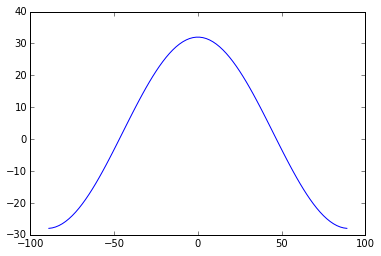

In [40]:
#  First define an initial temperature field
#   that is warm at the equator and cold at the poles
#   and varies smoothly with latitude in between

from climlab.utils import legendre
sfc = climlab.domain.zonal_mean_surface(num_lat=90, water_depth=10.)
lat = sfc.lat.points
initial = 12. - 40. * legendre.P2(np.sin(np.deg2rad(lat)))

plt.plot(lat, initial)

In [43]:
##  Set up the climlab diffusion process

# make a copy of initial so that it remains unmodified
Ts = climlab.Field(np.array(initial), domain=sfc)
# thermal diffusivity in W/m**2/degC
D = 0.55
# meridional diffusivity in 1/s
K = D / sfc.heat_capacity
# create the climlab diffusion process
#  setting the diffusivity and a timestep of ONE MONTH
from climlab.dynamics.diffusion import MeridionalDiffusion
d = MeridionalDiffusion(state=Ts, K=K, timestep=const.seconds_per_month)

print d

climlab Process of type <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>. 
State variables and domain shapes: 
  default: (90, 1) 
The subprocess tree: 
top: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>



In [44]:
#  We are going to step forward one month at a time
#  and store the temperature each time
niter = 5
temp = np.zeros((Ts.size, niter+1))
temp[:, 0] = np.squeeze(Ts)
for n in range(niter):
    d.step_forward()
    temp[:, n+1] = np.squeeze(Ts)

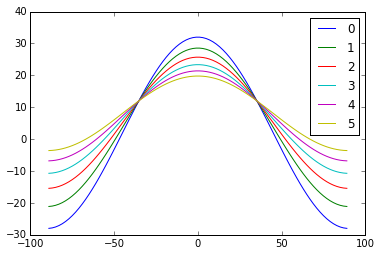

In [45]:
#  Now plot the temperatures
plt.plot(lat, temp)
plt.legend(range(niter+1))

At each timestep, the warm temperatures get cooler (at the equator) while the cold polar temperatures get warmer!

Diffusion is acting to **reduce the temperature gradient**.

If we let this run a long time, what should happen??

Try it yourself and find out!

____________
<a id='section4'></a>

## 4. Parameterizing the radiation terms
____________


Let's go back to the complete budget with our heat transport parameterization

$$ C(\phi) \frac{\partial T_s}{\partial t} = \text{ASR}(\phi) - \text{OLR}(\phi) + \frac{K}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(   \cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right) $$

We want to express this **as a closed equation for surface temperature $T_s$**.

First, as usual, we can write the solar term as

$$ \text{ASR} = (1-\alpha) ~ Q $$

Note that the solar term is (at least in annual average) larger at equator than poles… and transport term acts to flatten out the temperatures.

Now, we almost have a model we can solve for T!  Just need to express the OLR in terms of temperature.

So…  what’s the link between OLR and temperature????

[ discuss ]

we spent a good chunk of the course looking at this question, and developed a model of a vertical column of air.

We are trying now to build a model of the equator-to-pole (or pole-to-pole) temperature structure.

We COULD use an array of column models, representing temperature as a function of height and latitude (and time).

But instead, we will keep things simple, one spatial dimension at a time.

Introduce the following simple parameterization:

$$ OLR = A + B T_s $$

With $T_s$ the zonal average surface temperature in ºC, A is a constant in W m$^{-2}$ and B is a constant in W m$^{-2}$ ºC$^{-1}$. 



Go to notebook with OLR and temperature from NCEP reanalysis.

Fit a straight line through the scatterplot,
A = 210 W m-2
B = 2 W m-2 ºC-1

Note that in the global average, recall T = 288 K = 15ºC
And so this parameterization gives OLR = 210 + 15*2 = 240 W m-2
And the observed global mean OLR = 239 W m-2
So this is consistent.




Back to our model:
C  (∂T(ϕ,t))/∂t=(1-α)Q(ϕ,t)- (A+B T(ϕ,t))+K/cos⁡ϕ   ∂/∂ϕ [cos⁡ϕ  ∂T/∂ϕ]

Recap: parameters in this model are
C: heat capacity in J m-2 ºC-1
A: longwave emission at 0ºC in W m-2
B: increase in emission per degree, in W m-2 ºC-1
K: horizontal (north-south) diffusivity of the climate system in W m-2 ºC-1

This is the equation for a very important and useful simple model of the climate system. It is typically referred to as the (one-dimensional) energy balance model.

(although as we have seen over and over, EVERY climate model is actually an “energy balance model” of some kind)

Also for historical reasons this is often called the Budyko-Sellers model, after Budyko and Sellers who both (independently of each other) published influential papers on this subject in 1969.



seasonal versus annual mean models

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [1]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.0.0
OS Darwin 13.4.0 x86_64 i386 64bit
numpy 1.8.1
climlab 0.2.4
Wed Mar 25 10:39:56 2015 EDT